In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [49]:
in_path = "final_data/outputs/parsed/param_ans_synth_6_4_15.json"
out_path = "final_data/outputs/parsed/param_ans_synth_6_4_15.csv"

In [50]:
f = open(in_path, "r")

In [51]:
data = json.load(f)

In [52]:
data = pd.DataFrame(data["data"])

In [39]:
# data['likelihood_proper'] = np.exp(-data['likelihood'])
data["configuration"] = [f"{a}_{b}_{c}" for a,b,c in zip(data["alpha_q"], data["alpha_a"], data["beta"])]
data.set_index("configuration", inplace=True)
data

,answererType,alpha_q,alpha_a,beta,likelihood
configuration,,,,,
3_1_0.5,pragmatic,3,1,0.5,-156.847915
3_1_0.5,explicit,3,1,0.5,-177.442455
3_1_0.1,pragmatic,3,1,0.1,-160.603138
3_1_0.1,explicit,3,1,0.1,-178.513610
3_1_1.5,pragmatic,3,1,1.5,-158.700640
...,...,...,...,...,...
19_7_1.5,explicit,19,7,1.5,-188.936247
19_7_2.0,pragmatic,19,7,2.0,-248.129167
19_7_2.0,explicit,19,7,2.0,-203.681351


In [40]:
data.to_csv(out_path)

<AxesSubplot:xlabel='likelihood', ylabel='Density'>

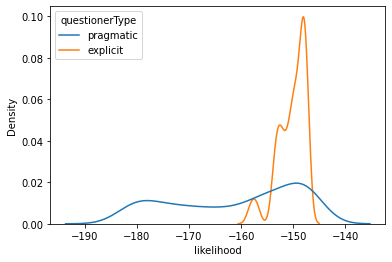

In [11]:
# sns.kdeplot("likelihood" , hue="answererType", data=data)
sns.kdeplot("likelihood" , hue="questionerType", data=data)

<AxesSubplot:xlabel='alpha_q', ylabel='likelihood'>

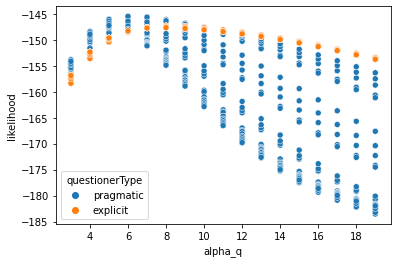

In [12]:
# sns.scatterplot(x="alpha_q", y="likelihood", hue="answererType", data=data)
sns.scatterplot(x="alpha_q", y="likelihood", hue="questionerType", data=data)

<AxesSubplot:xlabel='alpha_q', ylabel='likelihood'>

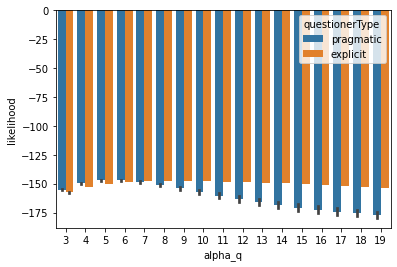

In [13]:
# sns.barplot(x="alpha_q", y="likelihood", hue="answererType", data=data)
sns.barplot(x="alpha_q", y="likelihood", hue="questionerType", data=data)

<AxesSubplot:xlabel='alpha_a', ylabel='likelihood'>

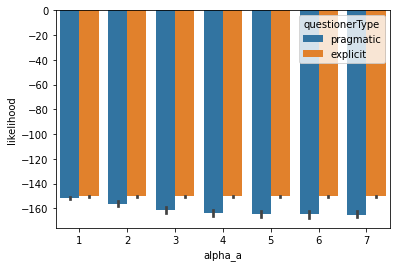

In [14]:
# sns.barplot(x="alpha_a", y="likelihood", hue="answererType", data=data)
sns.barplot(x="alpha_a", y="likelihood", hue="questionerType", data=data)

<AxesSubplot:xlabel='beta', ylabel='likelihood'>

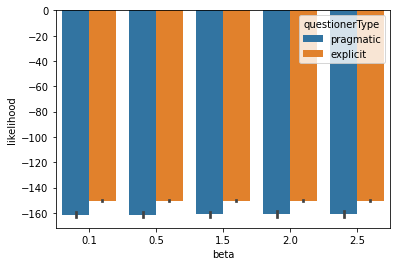

In [15]:
# sns.barplot(x="beta", y="likelihood", hue="answererType", data=data)
sns.barplot(x="beta", y="likelihood", hue="questionerType", data=data)

/Users/aditya/.pyenv/versions/3.8.6/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alpha_q', ylabel='count'>

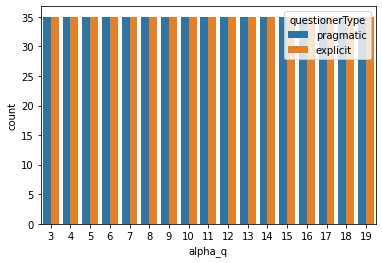

In [16]:
# sns.countplot("alpha_q" , hue="answererType", data=data)
sns.countplot("alpha_q" , hue="questionerType", data=data)

In [17]:
# sns.countplot("alpha_a" , hue="answererType", data=data)

In [18]:
# sns.countplot("beta" , hue="answererType", data=data)

In [19]:
# plt.figure(figsize=(10,10))
# sns.scatterplot(x="alpha_q", y="alpha_a", size="likelihood", hue="beta", data=data[data.answererType=="pragmatic"])

In [58]:
scatter = data[data.answererType=='pragmatic'].groupby(["alpha_q", "alpha_a"]).agg({"likelihood":"mean"}).reset_index()  

# scatter = data[data.questionerType=='explicit'].groupby(["alpha_q", "alpha_a"]).agg({"likelihood":"mean"}).reset_index()  

In [59]:
scatter = scatter.pivot("alpha_a", "alpha_q", "likelihood")
scatter

alpha_q,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
alpha_a,,,,,,,,,,,,,,,,,
1,-168.420279,-165.957919,-164.068625,-162.683880,-161.685617,-160.963393,-160.433509,-160.036911,-159.732795,-159.493125,-159.298683,-159.136328,-158.997106,-158.874942,-158.765727,-158.666691,-158.575961
2,-137.678080,-133.795019,-131.103092,-129.316642,-128.151659,-127.394872,-126.902781,-126.581396,-126.369230,-126.226056,-126.125683,-126.051255,-125.992122,-125.941733,-125.896215,-125.853405,-125.812204
3,-120.244226,-115.964868,-113.489243,-112.191955,-111.598796,-111.411221,-111.451838,-111.614967,-111.837004,-112.079839,-112.321244,-112.548988,-112.757103,-112.943462,-113.108201,-113.252697,-113.378916
4,-113.902025,-109.742815,-107.916248,-107.435435,-107.656503,-108.218692,-108.928311,-109.680439,-110.418112,-111.111570,-111.746992,-112.319946,-112.831401,-113.285250,-113.686772,-114.041692,-114.355630
5,-115.090773,-111.064568,-109.828748,-110.092552,-111.062331,-112.316991,-113.645319,-114.941870,-116.155373,-117.263767,-118.261182,-119.150606,-119.939592,-120.637711,-121.255062,-121.801422,-122.285807
6,-120.842880,-116.739493,-115.886689,-116.744729,-118.355837,-120.222194,-122.106003,-123.895800,-125.542425,-127.029235,-128.356878,-129.534832,-130.576571,-131.496840,-132.310147,-133.029992,-133.668508
7,-129.283895,-124.862591,-124.209816,-125.551427,-127.729503,-130.152354,-132.548939,-134.797599,-136.848400,-138.688404,-140.323880,-141.770318,-143.046815,-144.173044,-145.167703,-146.047813,-146.828456


In [60]:
def true_point(x,y):
    x = x-2.5
    y = y-0.5
    return (x,y)

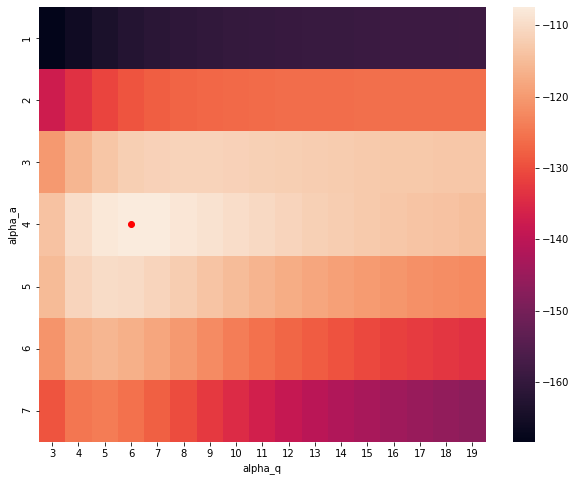

In [61]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(ylim = (1,7), xlim = (3,19))
sns.heatmap(scatter, ax=ax)
x, y = true_point(6,4)
plt.plot(x, y, "ro")

/Users/aditya/.pyenv/versions/3.8.6/lib/python3.8/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


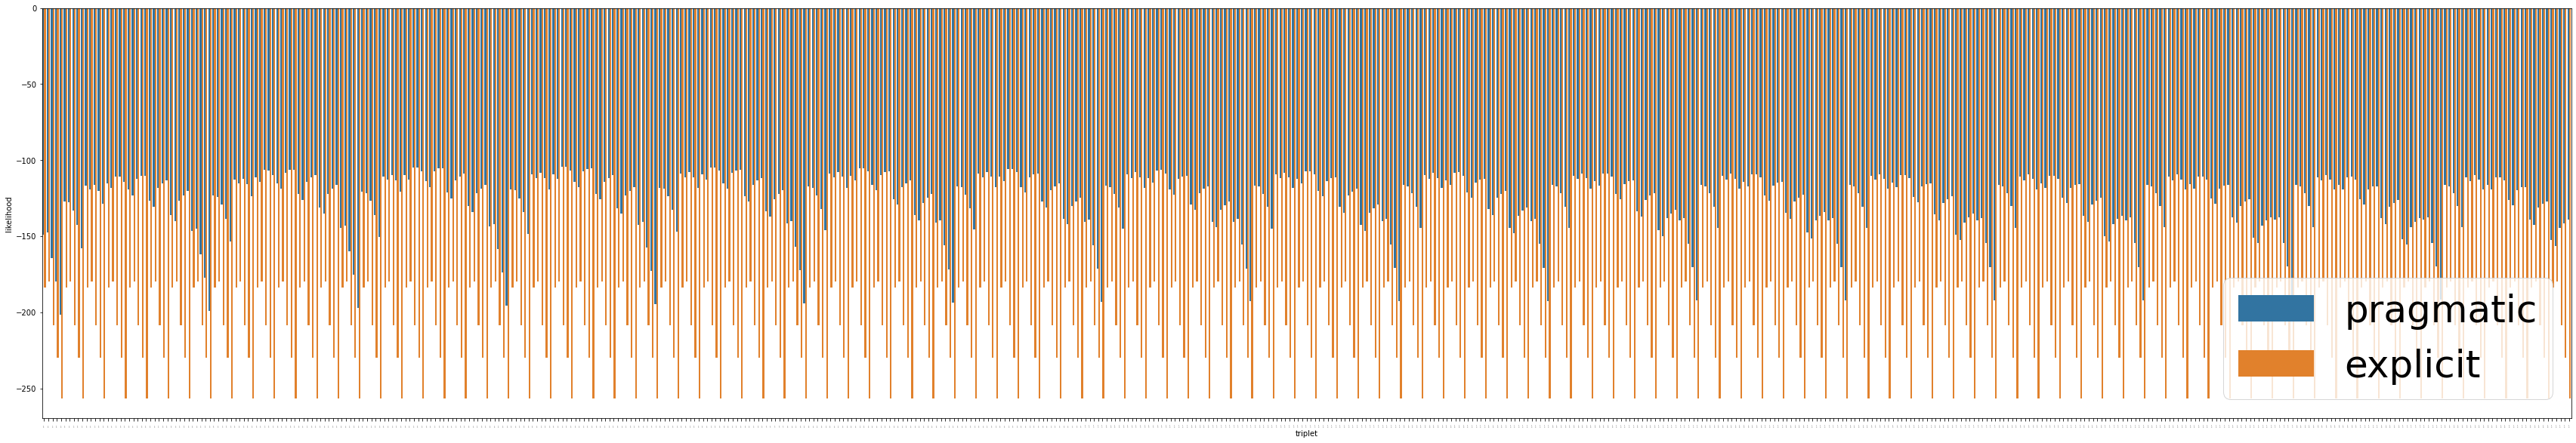

In [52]:
plt.figure(figsize=(60,10))
sns.barplot(x="triplet", y="likelihood", hue="answererType", data=data)
plt.xticks(rotation=90, size=0)
plt.legend(prop={'size':50})
plt.show()

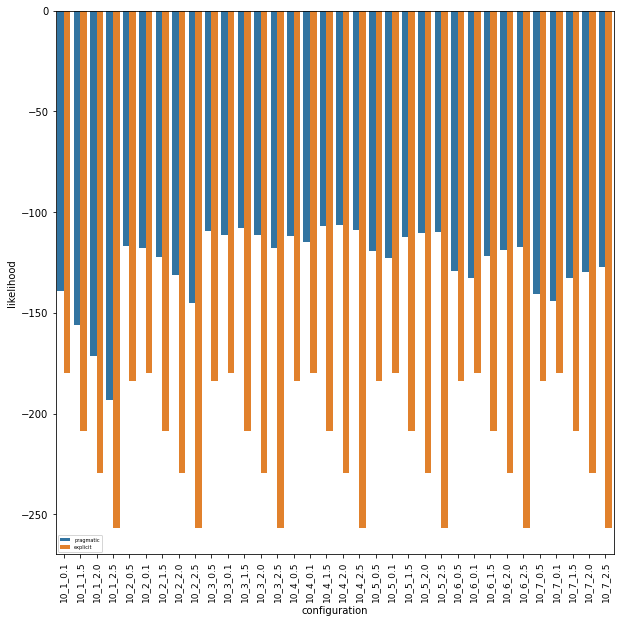

In [53]:
subset = data.loc["10_1_0.1":"10_7_2.5"]
plt.figure(figsize=(10,10))
sns.barplot(x=subset.index, y="likelihood", hue="answererType", data=subset)
plt.xticks(rotation=90, size=9)
plt.legend(prop={'size':5})
plt.show()

In [54]:
data[data.likelihood==max(data['likelihood'])]

,answererType,alpha_q,alpha_a,beta,likelihood,triplet
configuration,,,,,,
6_4_1.5,pragmatic,6,4,1.5,-104.409213,6_4_1.5


In [55]:
# plt.figure(figsize=(50,10))
# sns.barplot(x="triplet", y="likelihood", hue="answererType", data=data[data.answererType=='pragmatic'])
# plt.xticks(rotation=90, size=10)
# plt.show()